# Customer Churn Prediction

<h2>Table of Contents</h2>
<ul>
    <li><a href="#Concepts">Concepts</a></li>
    <li><a href="#Imports">Imports</a></li>
    <li><a href="#EDA">EDA</a></li>
    <ul>
        <li><a href="#Statistics">Statistics</a></li>
        <li><a href="#Correlation">Correlation</a></li>
        <li><a href='#Train-Test-Split'>Train-Test Split</a></li>
        <li><a href='#Hypothesis'>Hypothesis Test</a></li>
    </ul>
    <li><a href="#Prediction">Prediction</a></li>
</ul>

<h2 id="Concepts">Concepts</h2>

<b>Churn</b>: Measurement of the percentage of accounts that cancel or choose not to renew their subscriptions. It is the measure of how many customers stop using a product .
* A high churn rate can negatively impact Monthly Recurring Revenue (MRR) and can also indicate dissatisfaction with a product or service.
* Can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.
* If there were 10,000 total customers in March and 1,000 of them stopped being customers, the monthly churn rate would be 10%.

<b>Monthly Recurring Revenue (MRR)</b>: Calculation of revenue generation by month.
* Conveys an up-to-date measurement of the company’s health from an income standpoint.
* Companies with steady MRR have demonstrated an ability to earn an ongoing relationship with customers.
* Refers to all ongoing revenue normalized into a monthly number.
* A business can charge only once a year for its services, for example, and calculate its MRR by dividing that annual fee by 12.

<h2 id="Imports">Imports</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

<h2 id="EDA">EDA</h2>

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### Meaning of each column

<b>1 - RowNumber</b>: corresponds to the record (row) number and has no effect on the output.  
<b>2 - CustomerId</b>: contains random values and has no effect on customer leaving the bank.  
<b>3 - Surname</b>: the surname of a customer has no impact on their decision to leave the bank.  
<b>4 - CreditScore</b>: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
<b>5 - Geography</b>: a customer’s location can affect their decision to leave the bank.  
<b>6 - Gender</b>: it’s interesting to explore whether gender plays a role in a customer leaving the bank.  
<b>7 - Age</b>: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.  
<b>8 - Tenure</b>: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.  
<b>9 - Balance</b>: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.  
<b>10 - NumOfProducts</b>: refers to the number of products that a customer has purchased through the bank.  
<b>11 - HasCrCard</b>: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.  
<b>12 - IsActiveMember</b>: active customers are less likely to leave the bank.  
<b>13 - EstimatedSalary</b>: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.  
<b>14 - Exited</b>: whether or not the customer left the bank.  
<b>15 - Complain</b>: customer has complaint or not.  
<b>16 - Satisfaction Score</b>: Score provided by the customer for their complaint resolution.  
<b>17 - Card Type</b>: type of card hold by the customer.  
<b>18 - Points Earned</b>: the points earned by the customer for using credit card.  

> Lets check for missing values

In [4]:
df.isnull().sum() + df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

> And drop any duplicates

In [5]:
df = df.drop_duplicates()
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

> As the RowNumber and CustomerId columns are not going to be used we are going to drop them

In [6]:
df = df.drop(columns=['RowNumber', 'CustomerId'])

> Lets transform the columns that are 0 and 1 into booleans to help with understanding the data

In [7]:
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['Complain'] = df['Complain'].astype(bool)
df['Exited'] = df['Exited'].astype(bool)

> And transform the Gender and Card Type columns into data that can be used in the future for the model training

In [8]:
pd.get_dummies(df['Gender'], drop_first=True)

Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]

In [9]:
df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)

In [10]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [11]:
card_type_mapping = {
    'SILVER': 0,
    'GOLD': 1,
    'PLATINUM': 2,
    'DIAMOND': 3
    
}
df['Card Type Numeric'] = df['Card Type'].map(card_type_mapping)
df

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1       True               1        101348.88    True   
1                 1      False               1        112542.58   False   
2                 3       True               0        113931.57    True   
3                 2      False               0         93826.63   False   
4                 1       True               1         79084.10   False   
...             ...        ...             ...              ...     ...   
9995              2       True               0         96270.64   False   
9996              1       True               1        101699.77   False   
9997              1      False               1         42085.58    True   
9998              2       True               0         92888.52    True   
9999              1       True               0         38190.78   False   

      Complain  Satisfaction Score Card Type  Point Earned   Male  \
0         True                   2   DIAMOND           464  False   
1         True                   3   DIAMOND           456  False   
2         True                   3   DIAMOND           377  False   
3        False                   5      GOLD           350  False   
4        False                   5      GOLD           425  False   
...        ...                 ...       ...           ...    ...   
9995     False                   1   DIAMOND           300   True   
9996     False                   5  PLATINUM           771   True   
9997      True                   3    SILVER           564  False   
9998      True                   2      GOLD           339   True   
9999     False                   3   DIAMOND           911  False   

      Card Type Numeric  
0                     3  
1                     3  
2                     3  
3                     1  
4                     1  
...                 ...  
9995                  3  
9996                  2  
9997                  0  
9998                  1  
9999                  3  

[10000 rows x 18 columns]

<h3 id="Statistics">Statistics</h3>

> Lets better understand the statistics of the data we have

In [12]:
df_desc = df.describe()
df_desc.loc['IQR'] = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   
IQR      134.000000     12.000000      4.000000  127644.240000       1.000000   

       IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
count    10000.000000     10000.000000        10000.000000  10000.000000   
mean         0.515100    100090.239881            3.013800    606.515100   
std          0.499797     57510.492818            1.405919    225.924839   
min          0.000000        11.580000            1.000000    119.000000   
25%          0.000000     51002.110000            2.000000    410.000000   
50%          1.000000    100193.915000            3.000000    605.000000   
75%          1.000000    149388.247500            4.000000    801.000000   
max          1.000000    199992.480000            5.000000   1000.000000   
IQR          1.000000     98386.137500            2.000000    391.000000   

       Card Type Numeric  
count       10000.000000  
mean            1.501300  
std             1.118357  
min             0.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max             3.000000  
IQR             2.000000

In [13]:
numeric_df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Card Type Numeric']]

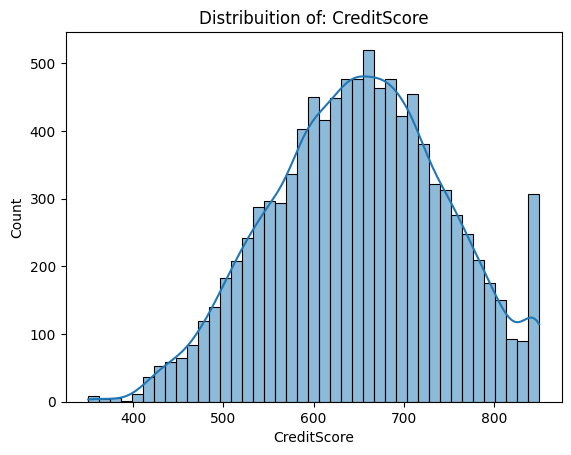

Distribution does not seem to be normal.


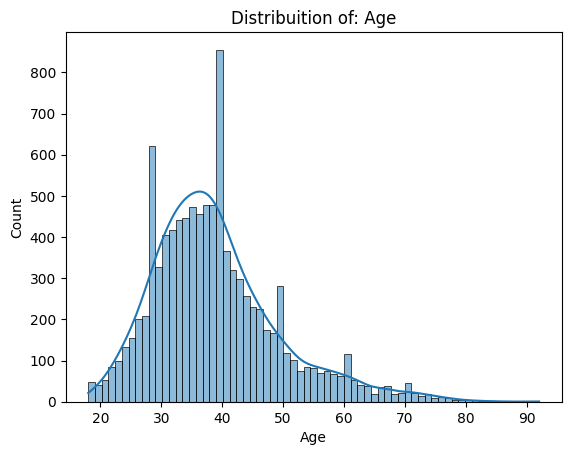

Distribution does not seem to be normal.


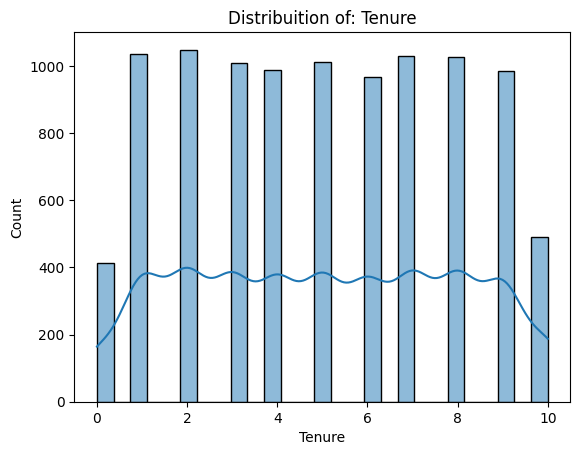

Distribution does not seem to be normal.


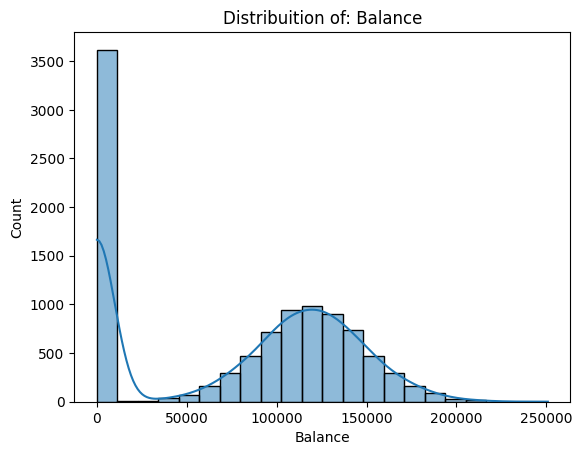

Distribution does not seem to be normal.


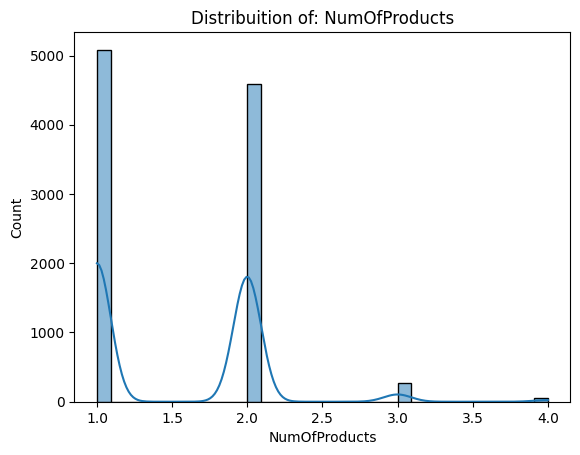

Distribution does not seem to be normal.


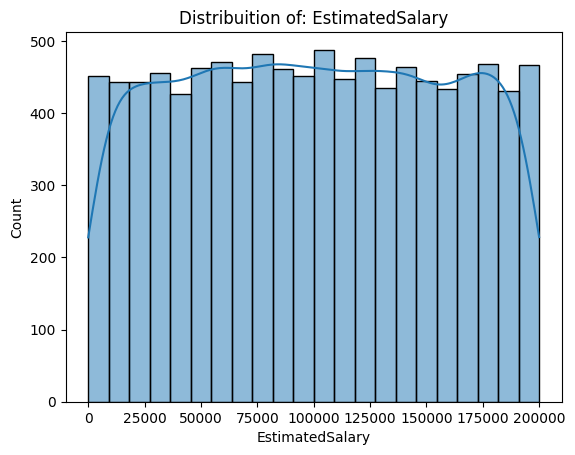

Distribution does not seem to be normal.


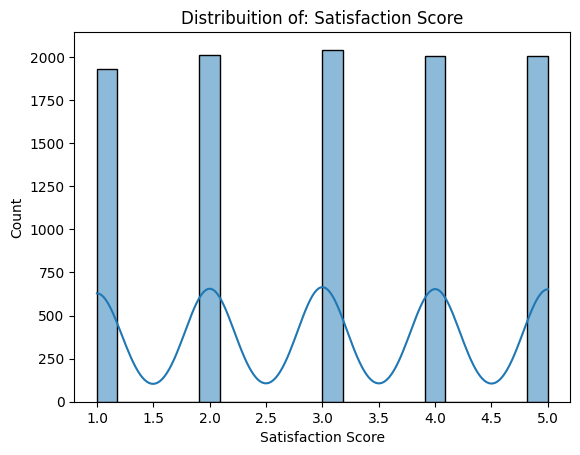

Distribution does not seem to be normal.


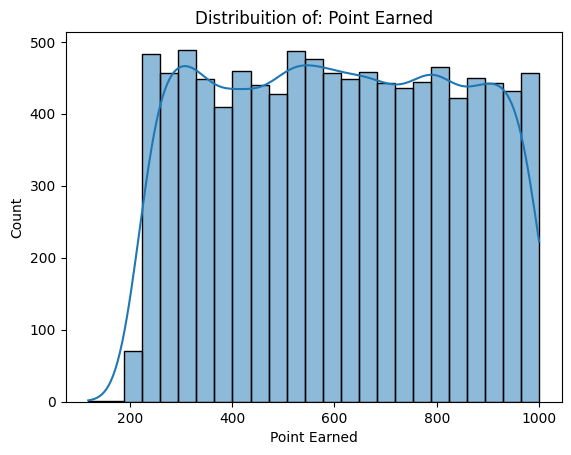

Distribution does not seem to be normal.


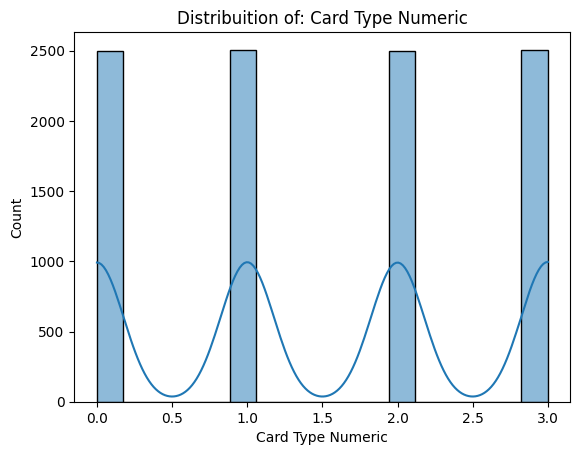

Distribution does not seem to be normal.


In [14]:
for column in numeric_df:
    test_stat, p = normaltest(df[column])
    
    sns.histplot(data = df,
                 x = column,
                 kde = True)
    plt.title(f"Distribuition of: {column}")
    plt.show()
    if p < 0.05:
        print("Distribution does not seem to be normal.")
    else:
        print("Distribution does seems to be normal.")

In [15]:
for column in numeric_df:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    faixa_de_tolerancia = 1.5
    lower_bound = Q1 - faixa_de_tolerancia * IQR
    upper_bound = Q3 + faixa_de_tolerancia * IQR
    
    aux_outliers = df[column].apply(lambda x : x < lower_bound or x > upper_bound)
    
    outliers_indices = aux_outliers[aux_outliers].index.tolist()
    
    if len(outliers_indices) >= 1:
        print(f'The column {column} has {len(outliers_indices)} outliers!')
        print("\n Its indices are:\n")
        print(outliers_indices)
    else:
        print(f'The column {column} has no outliers!')
        
    print()
    print('='*80)

The column CreditScore has 15 outliers!

 Its indices are:

[7, 942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723, 8762, 9210, 9356, 9624]

The column Age has 359 outliers!

 Its indices are:

[58, 85, 104, 158, 181, 230, 234, 243, 252, 310, 364, 371, 385, 399, 559, 567, 602, 612, 658, 678, 736, 766, 769, 807, 811, 823, 859, 884, 888, 948, 952, 957, 963, 969, 1009, 1039, 1040, 1055, 1205, 1234, 1235, 1246, 1252, 1278, 1285, 1342, 1387, 1407, 1410, 1439, 1457, 1519, 1543, 1607, 1614, 1790, 1810, 1866, 1901, 1904, 1907, 1933, 1981, 2002, 2012, 2039, 2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458, 2459, 2553, 2615, 2670, 2713, 2717, 2760, 2772, 2778, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3033, 3054, 3110, 3142, 3192, 3203, 3229, 3311, 3314, 3317, 3346, 3366, 3368, 3378, 3382, 3384, 3387, 3396, 3434, 3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3602, 3646, 3647, 3651, 3690, 3691, 3702, 3728, 3733, 3761, 3813, 3826, 3880, 3881, 3888, 3909, 3910, 3927, 3940, 

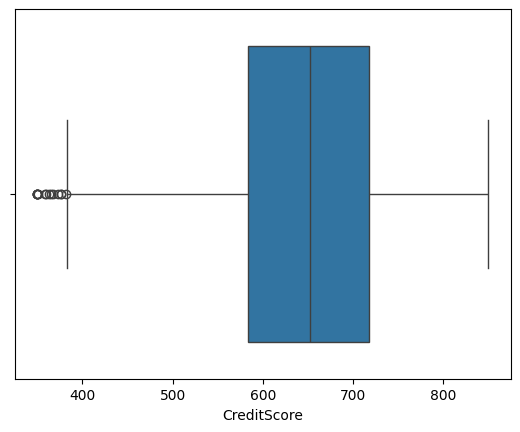

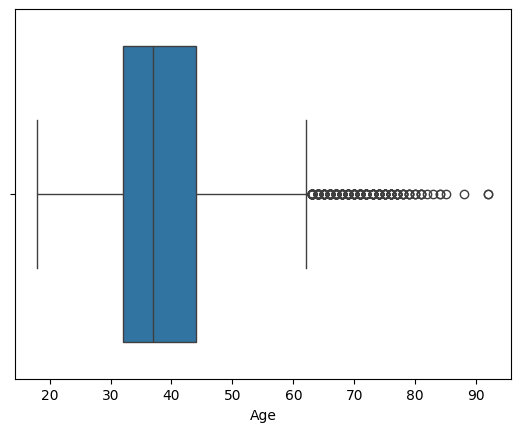

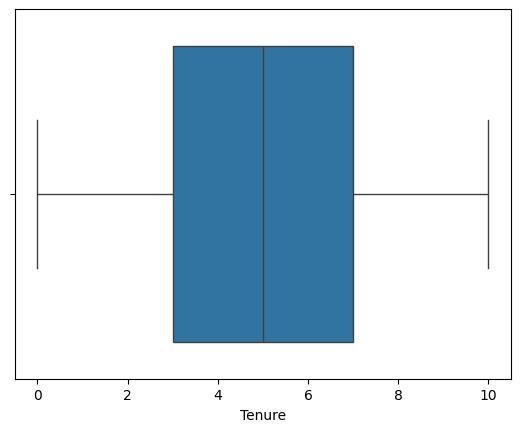

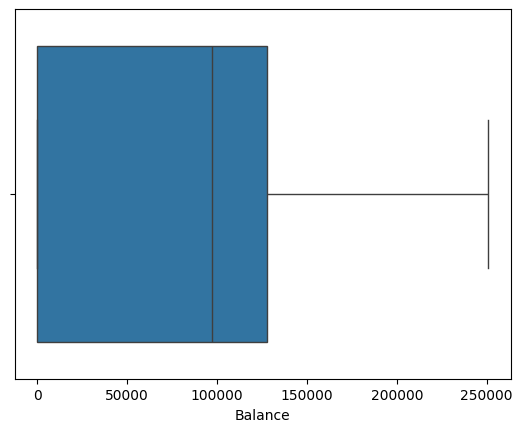

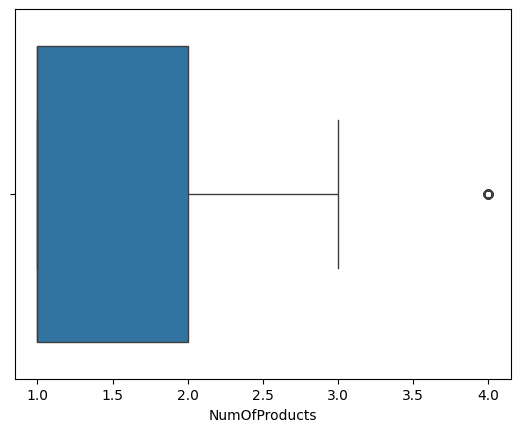

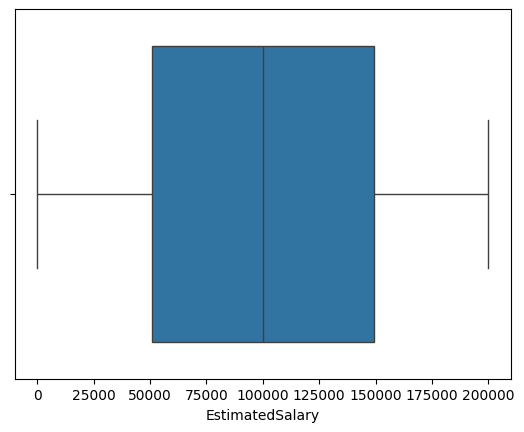

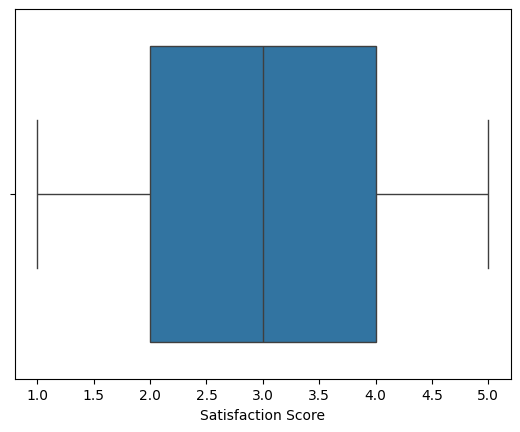

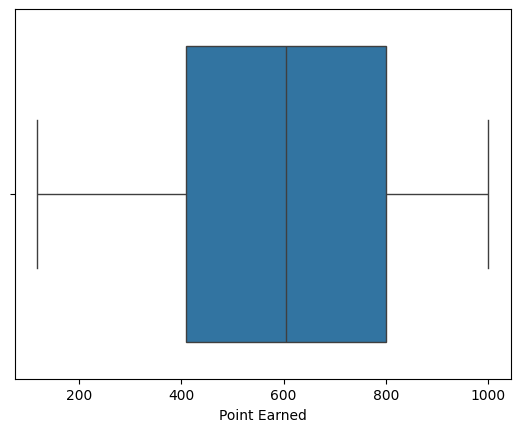

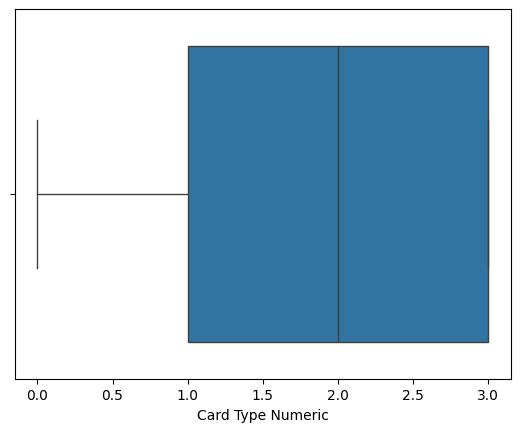

In [16]:
for column in numeric_df:
    sns.boxplot(data=df, x=column)
    plt.show()

In [17]:
df['Exited'].value_counts()

Exited
False    7962
True     2038
Name: count, dtype: int64

count     10000
unique        2
top       False
freq       7962
Name: Exited, dtype: object


<Axes: xlabel='Exited', ylabel='Count'>

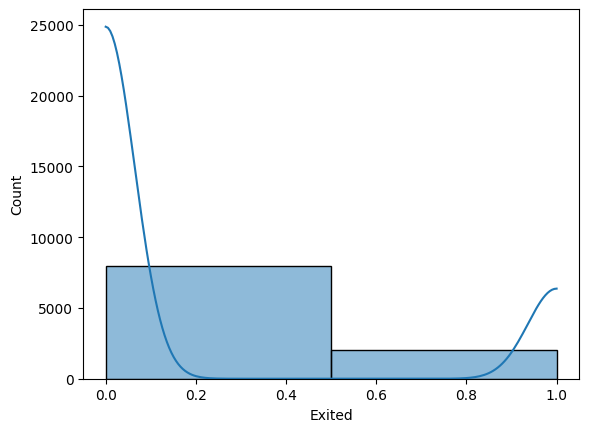

In [18]:
print(df['Exited'].describe())
sns.histplot(data=df, x='Exited', kde=True, bins=2)

<h3 id='Correlation'>Correlation</h3>

> As we saw before, the columns do not seem to be in a normal distribution, so we are going to use the spearman correlation

<Axes: >

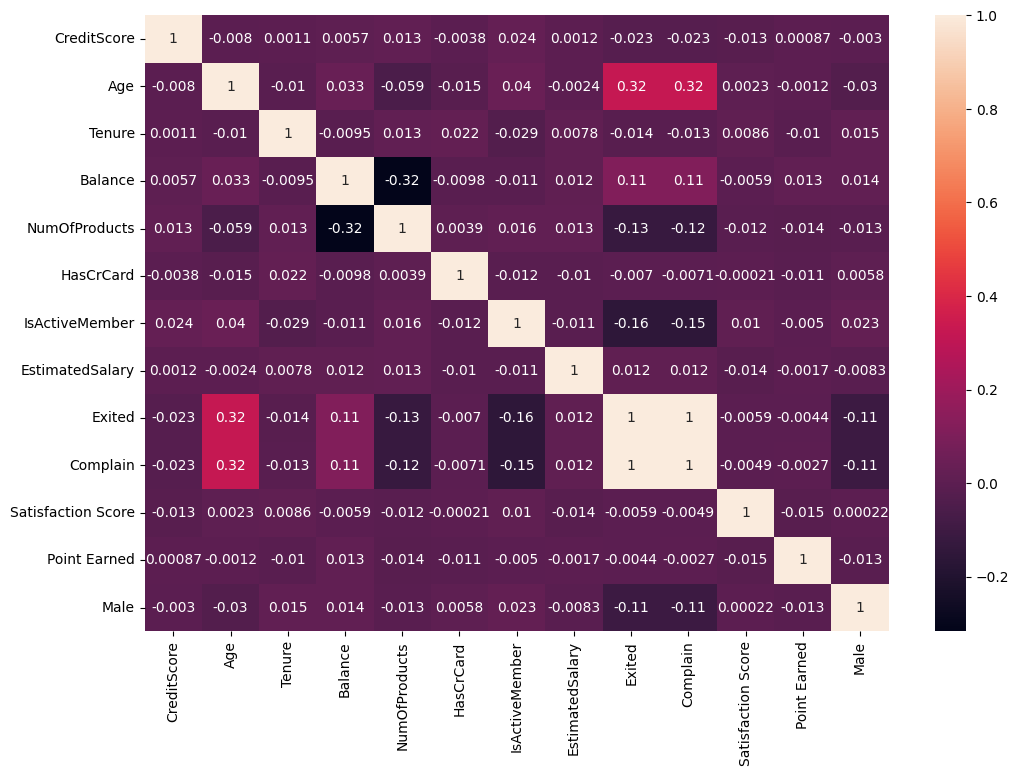

In [19]:
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned', 'Male']].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)

In [20]:
corr['Exited'].sort_values()

IsActiveMember       -0.156356
NumOfProducts        -0.125026
Male                 -0.106267
CreditScore          -0.022948
Tenure               -0.013628
HasCrCard            -0.006976
Satisfaction Score   -0.005905
Point Earned         -0.004406
EstimatedSalary       0.012472
Balance               0.111069
Age                   0.324012
Complain              0.995693
Exited                1.000000
Name: Exited, dtype: float64

> As we can see, the Complain column has an almost perfect correlation with the Exited column, which is the target. This can mean that the complaints are not being resolved, and thus almost always result in the client leaving

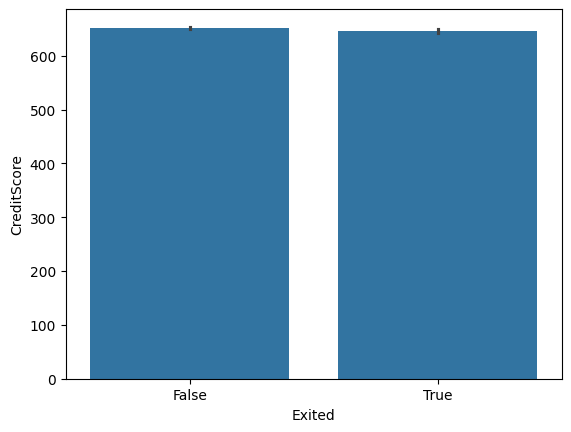

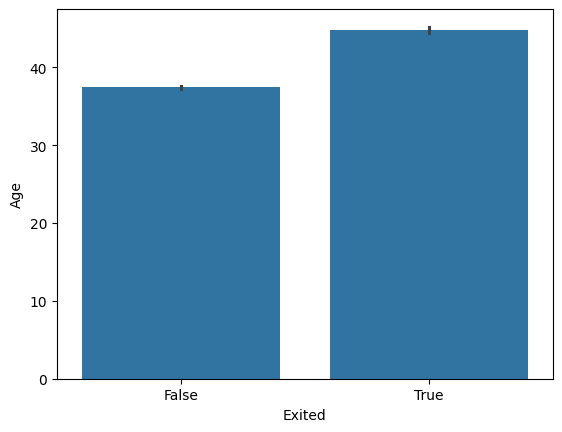

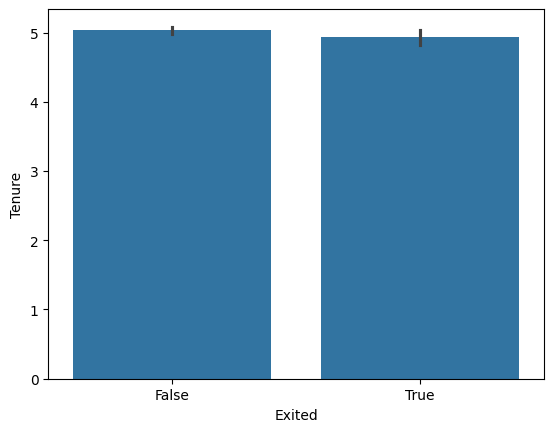

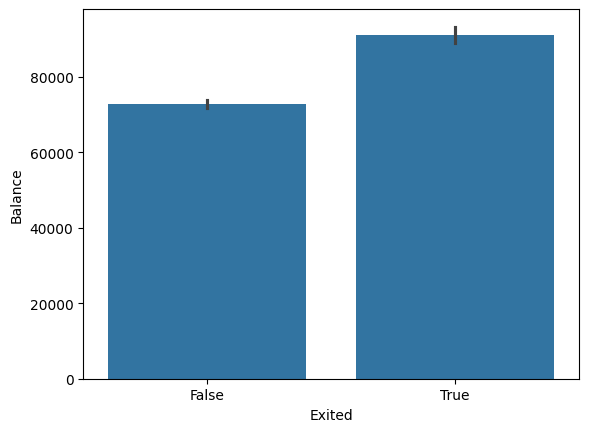

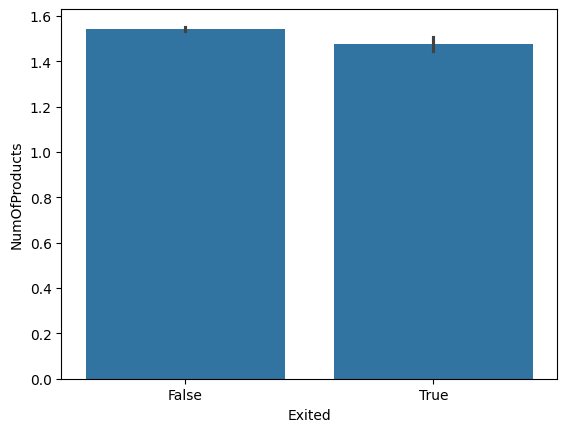

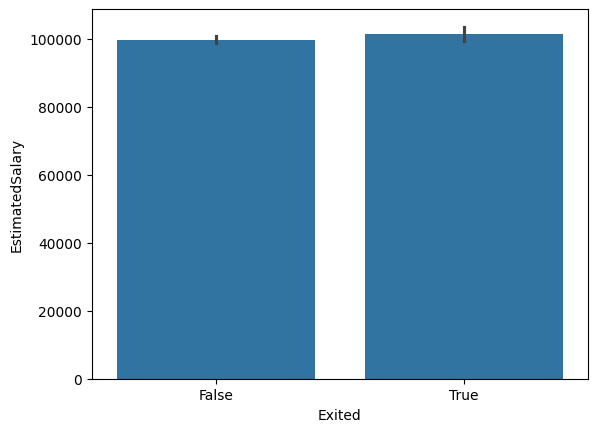

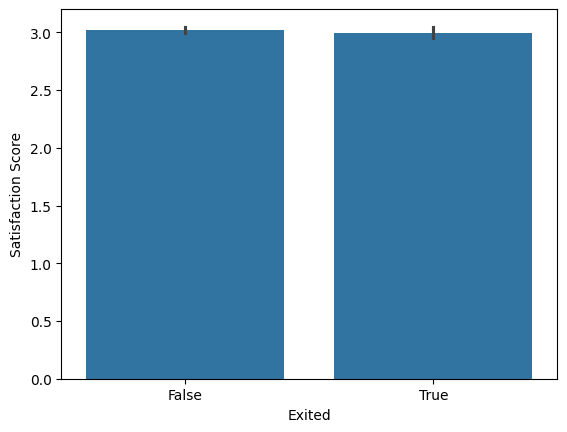

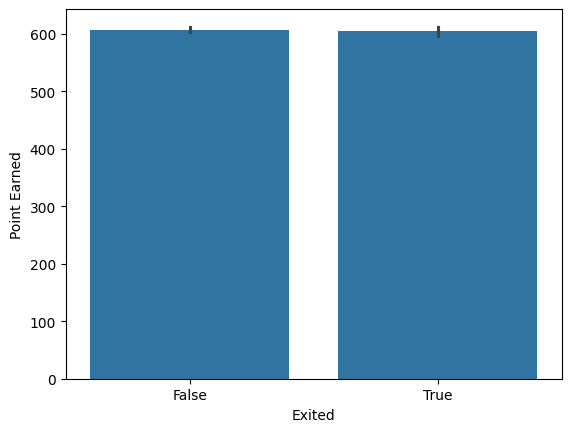

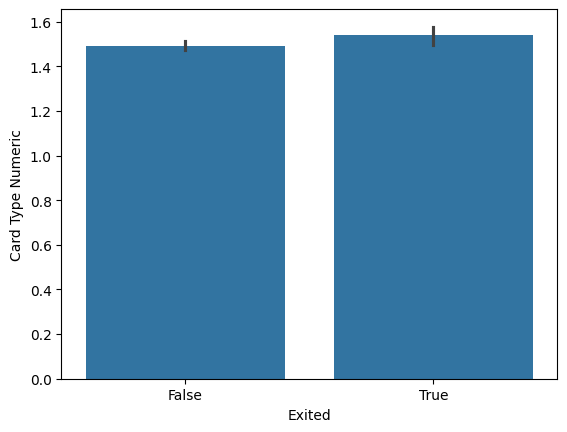

In [21]:
for column in numeric_df:
    sns.barplot(data=df, x='Exited', y=column, errorbar=('ci', 90))
    plt.show()

> Seems like the columns with the biggest relations to if the client exited are their Balance and their Age, with clients with bigger Balances being more prone to exiting as well as older clients.

> Lets save the dataframe with only the columns we are going to use in the next phases

In [22]:
df_bin = df.drop(columns=['Surname', 'Geography', 'Gender', 'Card Type', 'Complain'])
df_bin

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1       True   
1             608   41       1   83807.86              1      False   
2             502   42       8  159660.80              3       True   
3             699   39       1       0.00              2      False   
4             850   43       2  125510.82              1       True   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2       True   
9996          516   35      10   57369.61              1       True   
9997          709   36       7       0.00              1      False   
9998          772   42       3   75075.31              2       True   
9999          792   28       4  130142.79              1       True   

      IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  \
0                  1        101348.88    True                   2   
1                  1        112542.58   False                   3   
2                  0        113931.57    True                   3   
3                  0         93826.63   False                   5   
4                  1         79084.10   False                   5   
...              ...              ...     ...                 ...   
9995               0         96270.64   False                   1   
9996               1        101699.77   False                   5   
9997               1         42085.58    True                   3   
9998               0         92888.52    True                   2   
9999               0         38190.78   False                   3   

      Point Earned   Male  Card Type Numeric  
0              464  False                  3  
1              456  False                  3  
2              377  False                  3  
3              350  False                  1  
4              425  False                  1  
...            ...    ...                ...  
9995           300   True                  3  
9996           771   True                  2  
9997           564  False                  0  
9998           339   True                  1  
9999           911  False                  3  

[10000 rows x 13 columns]

In [23]:
df_bin.to_csv("customer-churn-redcords-binary.csv", index=False)

<h3 id='Train-Test-Split'>Train-Test Split</h3>

> Because of the disparity on the ammount of rows where Exited is true and false we are going to do undersampling so that both ammounts are equal

In [24]:
# Separate the True and False classes
true_class = df_bin[df_bin['Exited'] == True]
false_class = df_bin[df_bin['Exited'] == False]

# Determine the number of samples to match the minority class
min_class_size = min(len(true_class), len(false_class))

# Undersample the majority class
true_class_balanced = true_class.sample(min_class_size, random_state=42)
false_class_balanced = false_class.sample(min_class_size, random_state=42)

# Combine the balanced classes
df_balanced = pd.concat([true_class_balanced, false_class_balanced])

# Shuffle the DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
X = df_balanced.drop(columns='Exited')
y = df_balanced['Exited']

In [26]:
X.shape

(4076, 12)

In [27]:
y.value_counts(normalize=True)*100

Exited
True     50.0
False    50.0
Name: proportion, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3322          650   47       9       0.00              1       True   
2399          610   46       5   91897.80              1       True   
88            666   31       2   79589.43              1      False   
1064          584   28      10       0.00              2       True   
1735          707   52       7       0.00              1       True   
...           ...  ...     ...        ...            ...        ...   
1130          490   38       3   97266.10              1       True   
1294          524   31       8  107818.63              1       True   
860           559   38       3  145874.35              1       True   
3507          639   29       4  133434.57              2       True   
3174          826   49       0       0.00              1      False   

      IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
3322               0        187943.60                   4           600   
2399               0         54394.28                   1           914   
88                 0          4050.57                   5           569   
1064               0         19834.32                   3           706   
1735               0        109688.82                   1           533   
...              ...              ...                 ...           ...   
1130               1         92797.23                   4           762   
1294               0        199725.39                   1           462   
860                0         56311.39                   2           707   
3507               0         97983.44                   3           293   
3174               0        178709.98                   4           980   

       Male  Card Type Numeric  Exited  
3322  False                  3   False  
2399   True                  0   False  
88    False                  3   False  
1064   True                  1   False  
1735  False                  0    True  
...     ...                ...     ...  
1130  False                  3   False  
1294  False                  0    True  
860    True                  0    True  
3507   True                  2   False  
3174  False                  0    True  

[3260 rows x 13 columns]

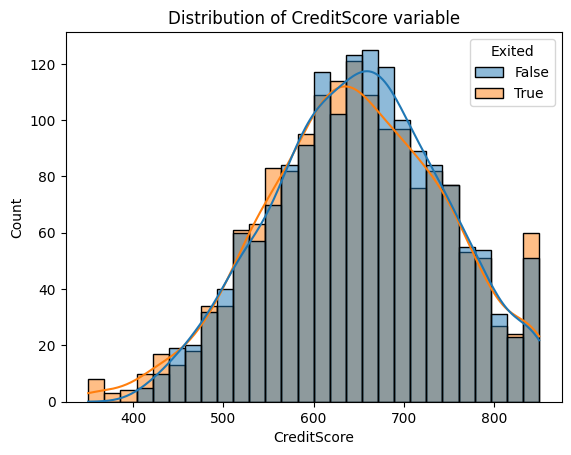

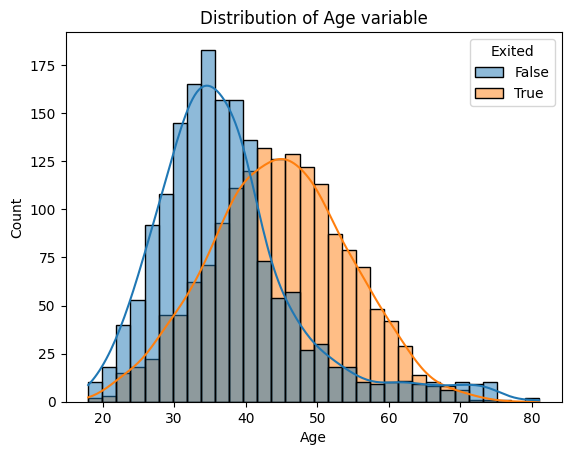

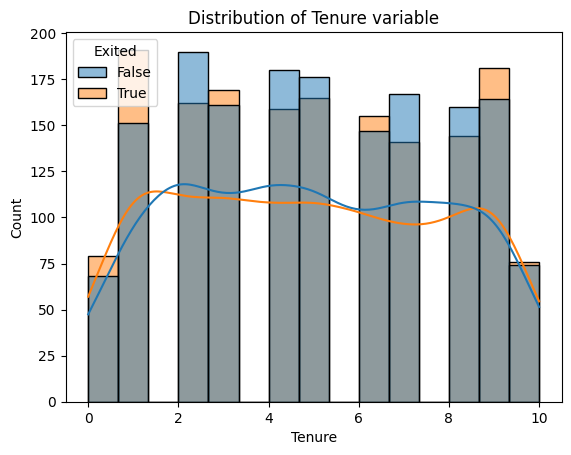

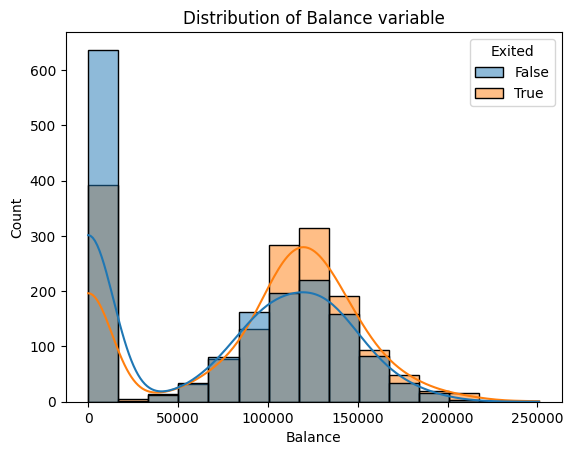

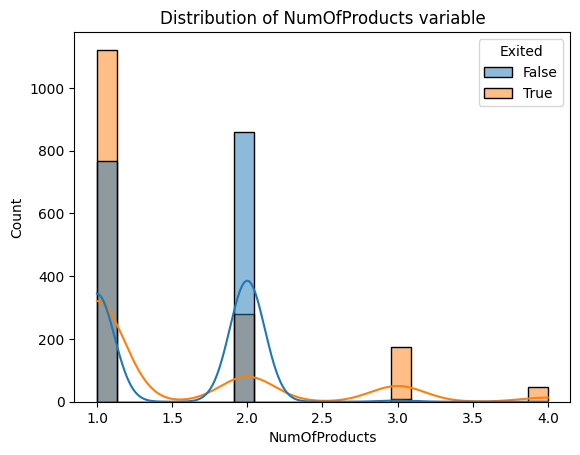

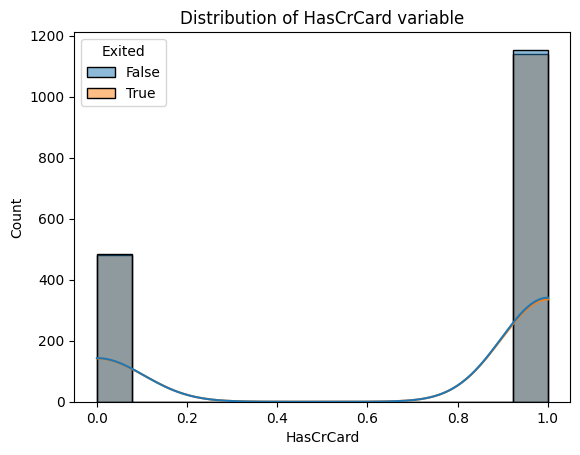

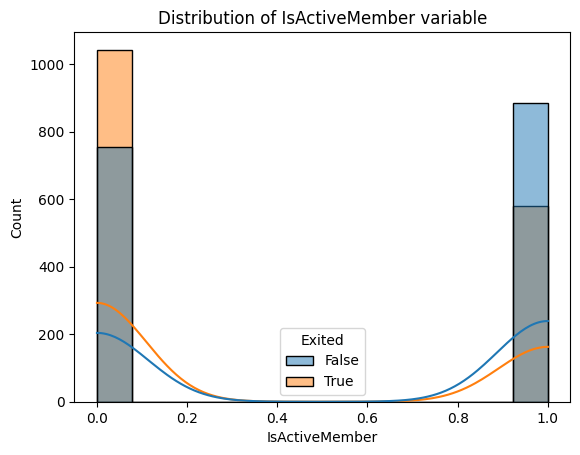

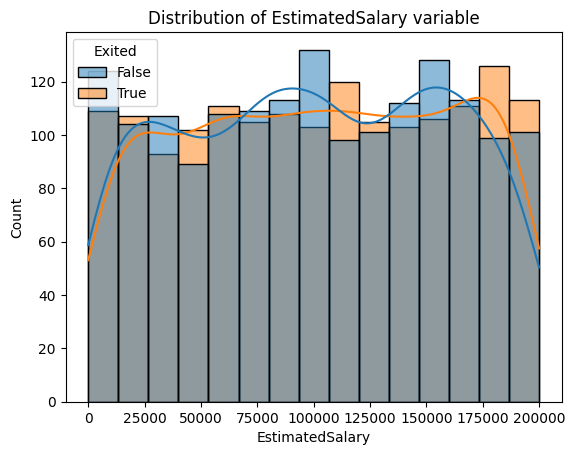

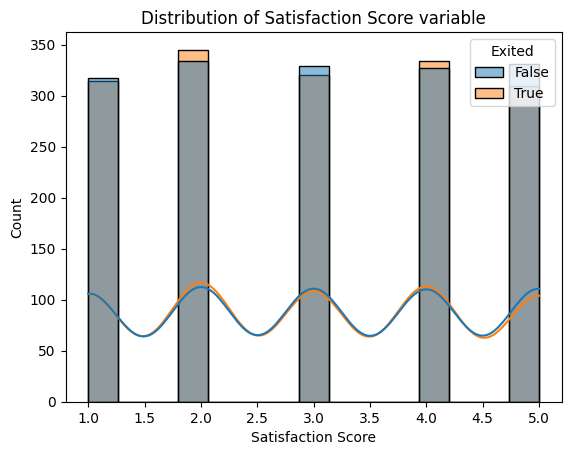

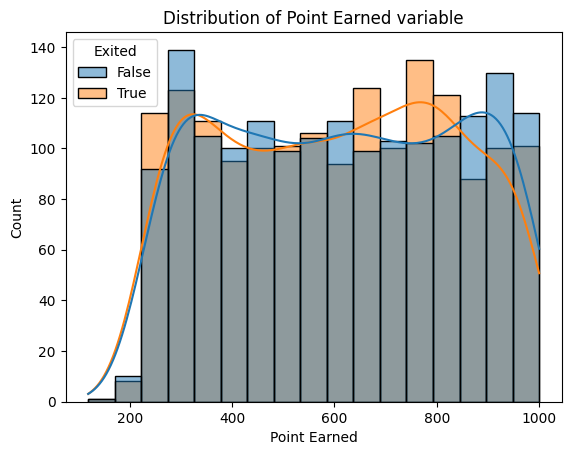

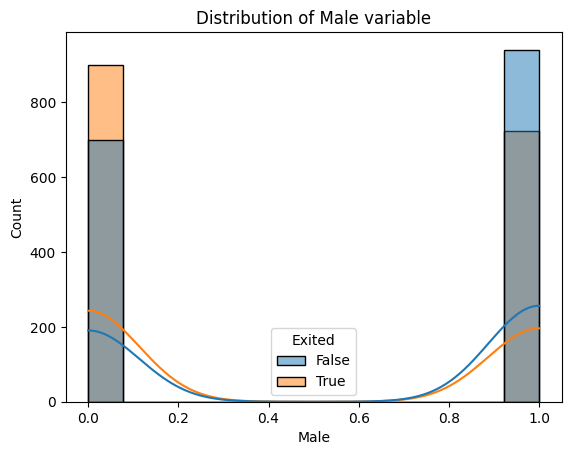

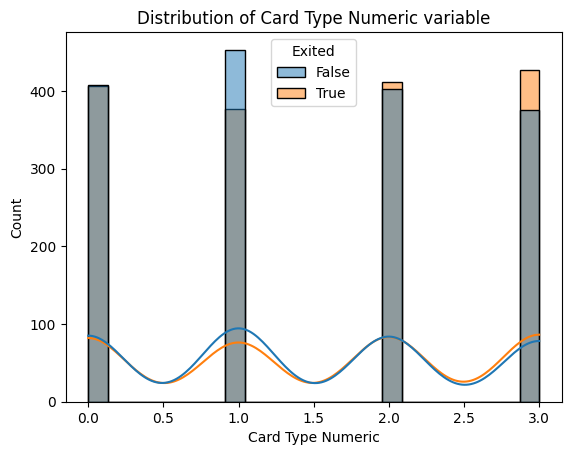

In [30]:
for column in X_train:
    sns.histplot(data=X_train, x=column, kde=True, hue=y_train).set_title(f'Distribution of {column} variable')
    plt.show()

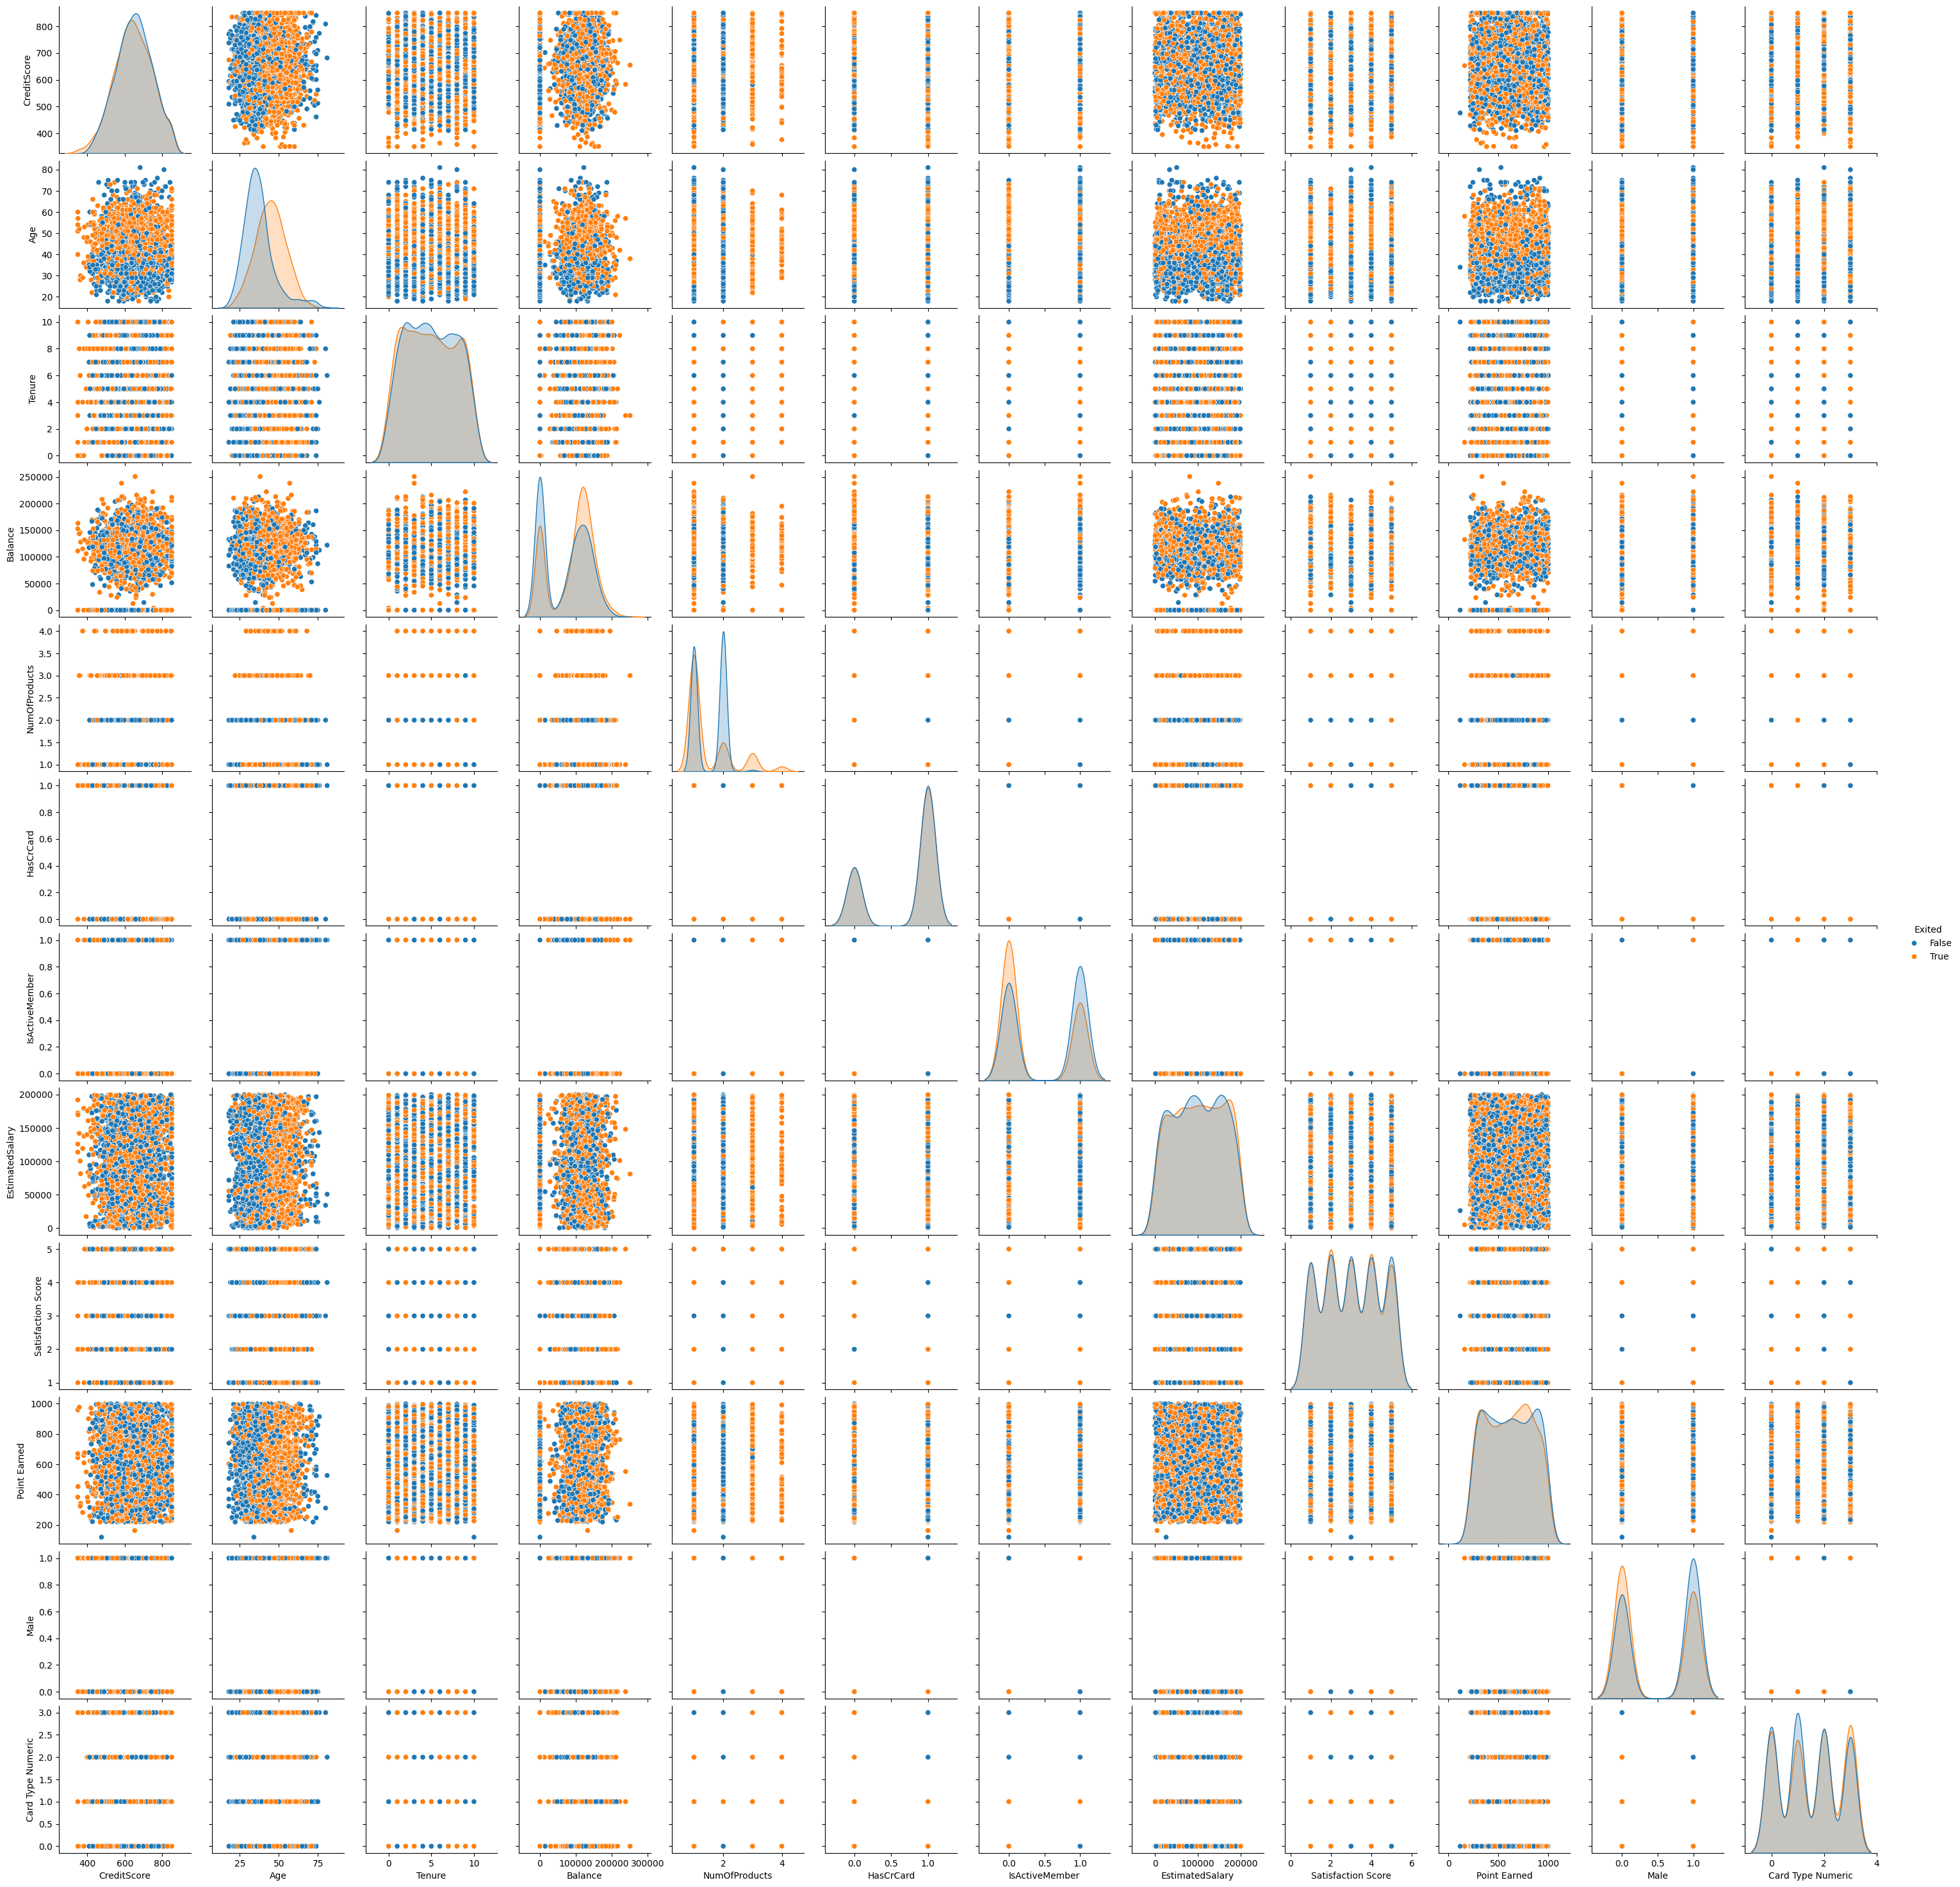

In [31]:
sns.pairplot(df_train, hue='Exited')

> The problem has non trivial spearation. So we are not going to use linear methods, more complex estimators are going to be needed

<h3 id="Hypothesis">Hypothesis Test</h3>

In [32]:
df_train.groupby("Exited").mean()

CreditScore        Age    Tenure       Balance  NumOfProducts  \
Exited                                                                  
False    650.558608  37.208791  4.982295  71878.854609       1.536630   
True     645.608508  44.684957  4.895808  92187.717910       1.472873   

        HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
Exited                                                                   
False    0.704518        0.539683     99835.909457            3.012821   
True     0.702836        0.356967    101945.925450            2.987053   

        Point Earned      Male  Card Type Numeric  
Exited                                             
False     613.392552  0.573871           1.454212  
True      605.204069  0.446363           1.530210

In [33]:
df_train.groupby("Exited").var()

CreditScore         Age    Tenure       Balance  NumOfProducts  \
Exited                                                                    
False    9009.968157  102.206838  8.172564  3.838914e+09       0.259806   
True    10114.953981   94.023450  8.709063  3.423580e+09       0.635599   

        HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
Exited                                                                   
False    0.208300        0.248577     3.312650e+09            1.987007   
True     0.208986        0.229683     3.362855e+09            1.956032   

        Point Earned      Male  Card Type Numeric  
Exited                                             
False   52946.699199  0.244693           1.204683  
True    51096.944758  0.247275           1.277002

In [34]:
did_exit = df_train.query("Exited == True")
didnt_exit = df_train.query("Exited == False")

In [35]:
class bcolors:
    OKGREEN = '\033[92m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [36]:
df_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3322          650   47       9       0.00              1       True   
2399          610   46       5   91897.80              1       True   
88            666   31       2   79589.43              1      False   
1064          584   28      10       0.00              2       True   
1735          707   52       7       0.00              1       True   
...           ...  ...     ...        ...            ...        ...   
1130          490   38       3   97266.10              1       True   
1294          524   31       8  107818.63              1       True   
860           559   38       3  145874.35              1       True   
3507          639   29       4  133434.57              2       True   
3174          826   49       0       0.00              1      False   

      IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
3322               0        187943.60                   4           600   
2399               0         54394.28                   1           914   
88                 0          4050.57                   5           569   
1064               0         19834.32                   3           706   
1735               0        109688.82                   1           533   
...              ...              ...                 ...           ...   
1130               1         92797.23                   4           762   
1294               0        199725.39                   1           462   
860                0         56311.39                   2           707   
3507               0         97983.44                   3           293   
3174               0        178709.98                   4           980   

       Male  Card Type Numeric  Exited  
3322  False                  3   False  
2399   True                  0   False  
88    False                  3   False  
1064   True                  1   False  
1735  False                  0    True  
...     ...                ...     ...  
1130  False                  3   False  
1294  False                  0    True  
860    True                  0    True  
3507   True                  2   False  
3174  False                  0    True  

[3260 rows x 13 columns]

For the distribution of feature CreditScore, we have:

t-statistic: 1.44; p-value: 1.49e-01

Failure in rejecting H_0: Seems there is no difference in the mean of "CreditScore" in each of its subpops


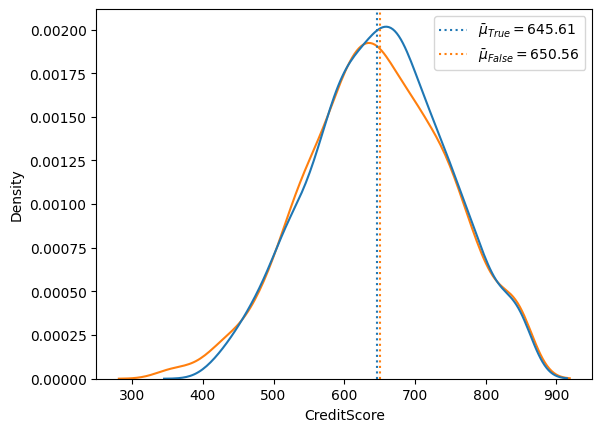



For the distribution of feature Age, we have:

t-statistic: -21.55; p-value: 2.17e-96

Rejected H_0: Seems there is difference in the mean of "Age" in each of its subpops!!!


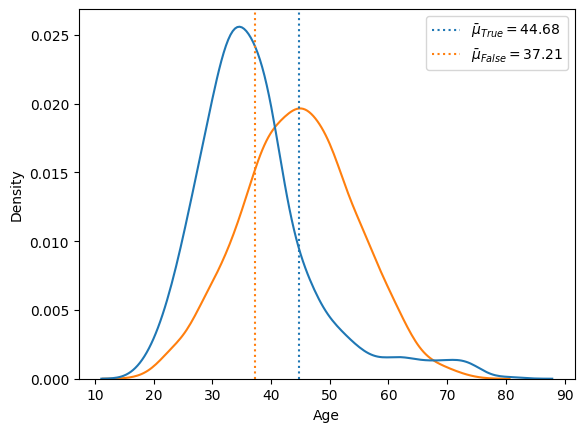



For the distribution of feature Tenure, we have:

t-statistic: 0.85; p-value: 3.96e-01

Failure in rejecting H_0: Seems there is no difference in the mean of "Tenure" in each of its subpops


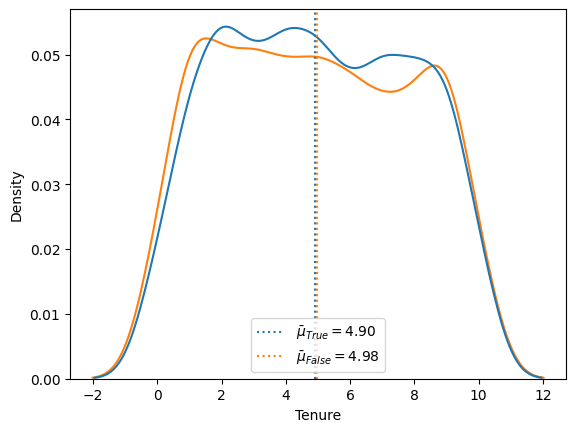



For the distribution of feature Balance, we have:

t-statistic: -9.62; p-value: 1.24e-21

Rejected H_0: Seems there is difference in the mean of "Balance" in each of its subpops!!!


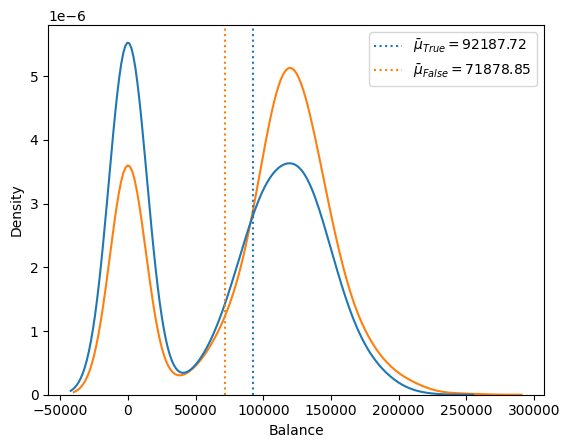



For the distribution of feature NumOfProducts, we have:

t-statistic: 2.72; p-value: 6.62e-03

Rejected H_0: Seems there is difference in the mean of "NumOfProducts" in each of its subpops!!!


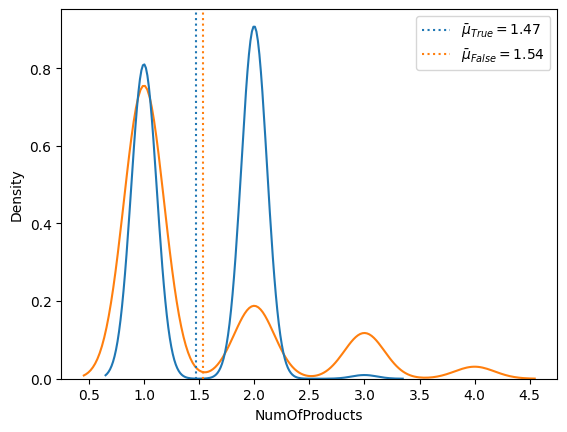



For the distribution of feature EstimatedSalary, we have:

t-statistic: -1.04; p-value: 2.97e-01

Failure in rejecting H_0: Seems there is no difference in the mean of "EstimatedSalary" in each of its subpops


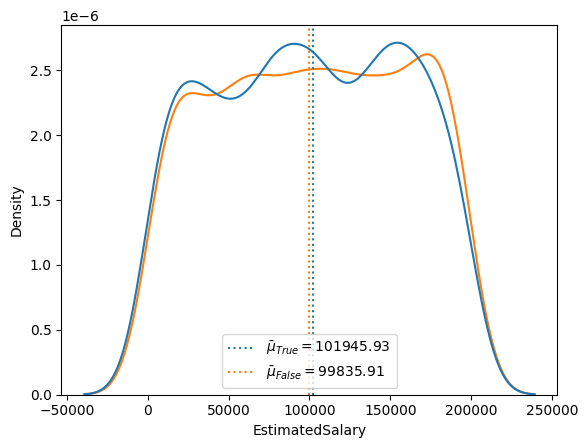



For the distribution of feature Satisfaction Score, we have:

t-statistic: 0.52; p-value: 6.00e-01

Failure in rejecting H_0: Seems there is no difference in the mean of "Satisfaction Score" in each of its subpops


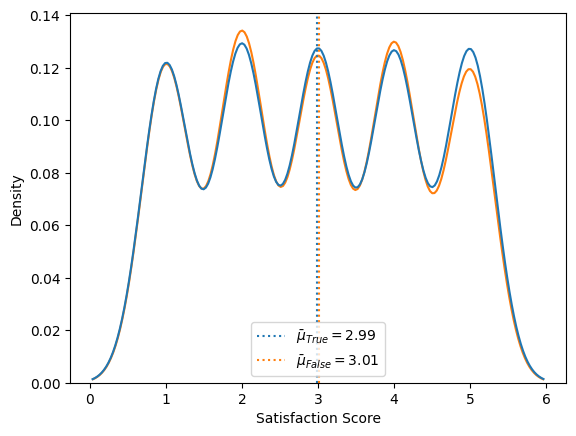



For the distribution of feature Point Earned, we have:

t-statistic: 1.02; p-value: 3.05e-01

Failure in rejecting H_0: Seems there is no difference in the mean of "Point Earned" in each of its subpops


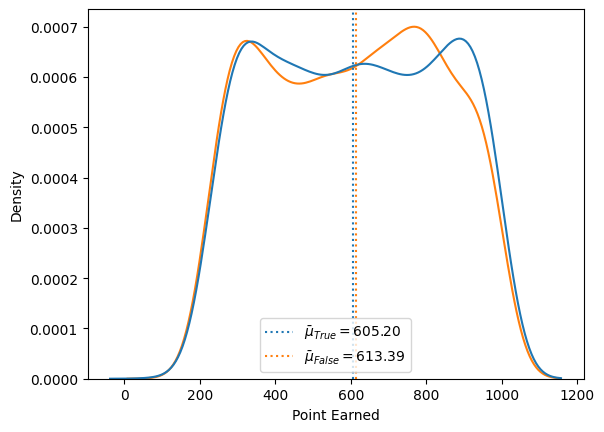



For the distribution of feature Card Type Numeric, we have:

t-statistic: -1.95; p-value: 5.16e-02

Failure in rejecting H_0: Seems there is no difference in the mean of "Card Type Numeric" in each of its subpops


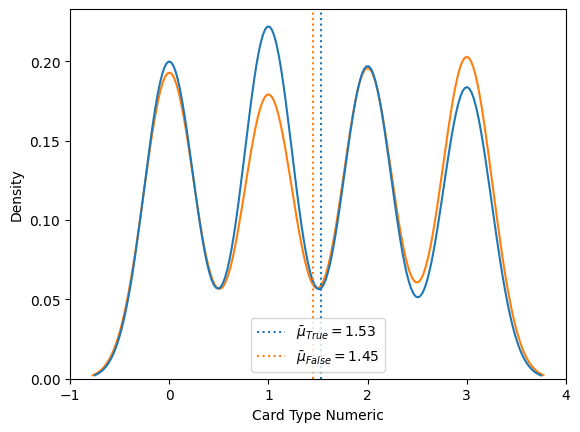

In [37]:
# 5% alpha
significance = 0.05

# Each class subpop
bad_subpop = df_train.query('Exited == True')
good_subpop = df_train.query('Exited == False')

for col in df_train.drop(columns=['Exited', 'HasCrCard', 'IsActiveMember', 'Male']):
    
    print(f'For the distribution of feature {col}, we have:\n')
    
    t, p_value = ttest_ind(good_subpop[col].values, bad_subpop[col].values, alternative='two-sided', equal_var=False)
    
    print(f't-statistic: {t:.2f}; p-value: {p_value:.2e}\n')
    
    if p_value > significance:
        
        str_fail = f'{bcolors.FAIL}{bcolors.BOLD}'
        str_fail += 'Failure in rejecting H_0: '
        str_fail += f'Seems there is no difference in the mean of "{col}" in each of its subpops'
        str_fail += f'{bcolors.ENDC}'
        
        print(str_fail)
        
    else:
        
        str_rej = f'{bcolors.OKGREEN}{bcolors.BOLD}'
        str_rej += 'Rejected H_0: '
        str_rej += f'Seems there is difference in the mean of "{col}" in each of its subpops!!!'
        str_rej += f'{bcolors.ENDC}'
    
        print(str_rej)
        
    # =======================================
    
    sns.kdeplot(data=df_train, x=col, hue='Exited')
    
    # calculating the amostral mean of each subpop
    mu_good, mu_bad = good_subpop[col].mean(), bad_subpop[col].mean()
        
    plt.axvline(x=mu_bad, color='C0', label=r'$\bar{\mu}_{True}=$'+f'{mu_bad:.2f}', ls=':')
    plt.axvline(x=mu_good, color='C1', label=r'$\bar{\mu}_{False}=$'+f'{mu_good:.2f}', ls=':')

    plt.legend()
    plt.show()
    
    # =======================================
    
    print()
    print('='*80)
    print()

> Conclusion: We have a classification problem which classes are not trivially separated but there is some separability, so we have hope that a minimaly performatic model can be made

<h2 id="Prediction">Prediction</h2>

In [38]:
pipe_logit = Pipeline([("scaler", StandardScaler()),
                       ("logit", LogisticRegression())])

pipe_logit.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logit', LogisticRegression())])

In [39]:
def clf_metrics(modelo, X, y_true, label, plot_conf_mat=True, print_cr=True):
    
    if print_cr:
        print(f"\{label} avaliation metrics:\n")
    
    y_pred = modelo.predict(X)

    if plot_conf_mat:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))

        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax[0]) 
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize="all", ax=ax[1])
        plt.show()

    if print_cr:
        print(classification_report(y_true, y_pred))
    
    return classification_report(y_true, y_pred, output_dict=True)

> We are going to use the recall as the key metric as it is crucial to identify as many customers who are likely to churn as possible. In the context of a credit card company, failing to identify a customer who is about to churn can result in lost revenue and missed opportunities for customer retention strategies. By maximizing recall, we ensure that we capture the majority of potential churners, allowing the company to take proactive measures to retain these customers.

In [ ]:
def modeling_cicle_experiments(dict_pipes, 
                                    plot_conf_mat=False, print_cr=False,
                                    print_progress = False):
    
    resultado_experimentos = {"estimator" : [],
                              "true_recall_train" : [],
                              "true_recall_test" : []}

    for label, pipe in dict_pipes.items():

        if print_progress:
            print("\n")
            print("="*80)
            print(f"Estimator: {label}".center(80))
            print("(with default hyperparameters)".center(80))
            print("="*80)
            print("\n")

        # ================================

        pipe.fit(X_train, y_train)

        train_metrics_dict = clf_metrics(pipe, X_train, y_train, "train", 
                                                      plot_conf_mat=plot_conf_mat, print_cr=print_cr)

        if print_progress:
            print("#"*80)

        test_metrics_dict = clf_metrics(pipe, X_test, y_test, "test", 
                                                     plot_conf_mat=plot_conf_mat, print_cr=print_cr)

        # Get the metrics to save
        f1_train = train_metrics_dict["True"]["recall"]
        f1_test = test_metrics_dict["True"]["recall"]

        # ================================
        # Keeping the experiment results
        resultado_experimentos["estimator"].append(label)
        resultado_experimentos["true_recall_train"].append(f1_train)
        resultado_experimentos["true_recall_test"].append(f1_test)


    df_results = pd.DataFrame(resultado_experimentos)

    df_results["gap"] = (df_results["true_recall_train"] - df_results["true_recall_test"]).apply(lambda x: x if x > 0 else np.inf)

    df_results = df_results.sort_values("true_recall_test", ascending=False).sort_values("gap")

    return df_results

In [41]:
pipe_logit = Pipeline([("scaler", StandardScaler()),
                       ("logit", LogisticRegression(random_state=42))])

pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))])

pipe_dt = Pipeline([("scaler", StandardScaler()),
                    ("dt", DecisionTreeClassifier(random_state=42))])

pipe_svm = Pipeline([("scaler", StandardScaler()),
                     ("svm", SVC(random_state=42))])

pipe_xbgoost = Pipeline([("scaler", StandardScaler()),
                         ("xgboost", XGBClassifier(random_state=42))])

pipe_lgbm = Pipeline([("scaler", StandardScaler()),
                      ("lgbm", LGBMClassifier(random_state=42))])

pipe_knn = Pipeline([("scaler", StandardScaler()),
                     ("knn", KNeighborsClassifier())])

# =======================================

dict_pipes = {"logit" : pipe_logit,
              "random_forest" : pipe_rf,
              "decision_tree" : pipe_dt,
              "svm" : pipe_svm,
              "xgboost" : pipe_xbgoost,
              "lgbm" : pipe_lgbm,
              "knn" : pipe_knn}

# =======================================

df_results = modeling_cicle_experiments(dict_pipes, 
                                             plot_conf_mat=False, print_cr=False,
                                             print_progress = False)

df_results

[LightGBM] [Info] Number of positive: 1622, number of negative: 1638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 3260, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497546 -> initscore=-0.009816
[LightGBM] [Info] Start training from score -0.009816


estimator  true_recall_train  true_recall_test       gap
0          logit           0.684957          0.665865  0.019091
3            svm           0.778668          0.745192  0.033476
6            knn           0.782984          0.661058  0.121926
5           lgbm           0.929716          0.728365  0.201351
4        xgboost           0.994451          0.723558  0.270894
1  random_forest           1.000000          0.701923  0.298077
2  decision_tree           1.000000          0.689904  0.310096

In [52]:
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(n_jobs=-1, random_state=42))])

params_distributions = {"rf__n_estimators" : np.arange(100, 1501, 1), 
                        "rf__max_depth" : np.arange(2, 9, 1)}

# Cross validation strategy
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

rand_grid_rf = RandomizedSearchCV(pipe_rf, 
                                  params_distributions, 
                                  n_iter=20,
                                  cv=splitter,
                                  scoring="recall",
                                  verbose=10,
                                  n_jobs=-1,
                                  random_state=42,
                                  return_train_score=True)

rand_grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START rf__max_depth=7, rf__n_estimators=365......................
[CV 2/5; 1/20] START rf__max_depth=7, rf__n_estimators=365......................
[CV 3/5; 1/20] START rf__max_depth=7, rf__n_estimators=365......................
[CV 4/5; 1/20] START rf__max_depth=7, rf__n_estimators=365......................
[CV 5/5; 1/20] START rf__max_depth=7, rf__n_estimators=365......................
[CV 1/5; 2/20] START rf__max_depth=2, rf__n_estimators=960......................
[CV 2/5; 2/20] START rf__max_depth=2, rf__n_estimators=960......................
[CV 3/5; 2/20] START rf__max_depth=2, rf__n_estimators=960......................
[CV 1/5; 1/20] END rf__max_depth=7, rf__n_estimators=365;, score=(train=0.756, test=0.709) total time=   1.2s
[CV 4/5; 2/20] START rf__max_depth=2, rf__n_estimators=960......................
[CV 4/5; 1/20] END rf__max_depth=7, rf__n_estimators=365;, score=(train=0.749, test=0.693) total ti

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'rf__max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                                        'rf__n_estimators': array([ 100,  101,  102, ..., 1498, 1499, 1500])},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=10)

In [53]:
pd.DataFrame(rand_grid_rf.cv_results_).sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16       2.738246      0.124136         0.163526        0.044424   
5        2.506698      0.282236         0.120719        0.060406   
0        1.265917      0.115002         0.059680        0.005898   
12       4.346127      0.317762         0.307946        0.112637   
9        4.737919      0.169489         0.278138        0.108632   
8        4.382230      0.029987         0.257662        0.092673   
3        3.592341      0.230322         0.232629        0.051458   
2        3.520412      0.246510         0.250807        0.128554   
14       3.408626      0.151080         0.282437        0.067087   
15       2.800416      0.095005         0.242300        0.047842   
4        0.672196      0.101761         0.050881        0.011990   
7        0.799601      0.134771         0.056733        0.021416   
18       1.609736      0.251707         0.085582        0.026005   
10       0.801797      0.125530         0.062959        0.017784   
19       1.646661      0.162420         0.102248        0.015003   
13       3.116255      0.531015         0.217724        0.065026   
11       1.896174      0.121774         0.106268        0.038963   
17       3.326072      0.084314         0.239947        0.122674   
1        2.200692      0.186568         0.145493        0.070065   
6        1.241220      0.134373         0.064621        0.006326   

    param_rf__n_estimators  param_rf__max_depth  \
16                     916                    6   
5                      761                    6   
0                      365                    7   
12                    1445                    6   
9                     1417                    7   
8                     1475                    5   
3                     1088                    5   
2                     1287                    5   
14                    1208                    5   
15                     948                    5   
4                      230                    6   
7                      323                    5   
18                     452                    5   
10                     384                    3   
19                     683                    4   
13                    1132                    3   
11                     869                    2   
17                    1284                    2   
1                      960                    2   
6                      566                    2   

                                            params  split0_test_score  \
16   {'rf__n_estimators': 916, 'rf__max_depth': 6}           0.718182   
5    {'rf__n_estimators': 761, 'rf__max_depth': 6}           0.715152   
0    {'rf__n_estimators': 365, 'rf__max_depth': 7}           0.709091   
12  {'rf__n_estimators': 1445, 'rf__max_depth': 6}           0.709091   
9   {'rf__n_estimators': 1417, 'rf__max_depth': 7}           0.709091   
8   {'rf__n_estimators': 1475, 'rf__max_depth': 5}           0.709091   
3   {'rf__n_estimators': 1088, 'rf__max_depth': 5}           0.706061   
2   {'rf__n_estimators': 1287, 'rf__max_depth': 5}           0.709091   
14  {'rf__n_estimators': 1208, 'rf__max_depth': 5}           0.709091   
15   {'rf__n_estimators': 948, 'rf__max_depth': 5}           0.706061   
4    {'rf__n_estimators': 230, 'rf__max_depth': 6}           0.703030   
7    {'rf__n_estimators': 323, 'rf__max_depth': 5}           0.690909   
18   {'rf__n_estimators': 452, 'rf__max_depth': 5}           0.693939   
10   {'rf__n_estimators': 384, 'rf__max_depth': 3}           0.696970   
19   {'rf__n_estimators': 683, 'rf__max_depth': 4}           0.703030   
13  {'rf__n_estimators': 1132, 'rf__max_depth': 3}           0.696970   
11   {'rf__n_estimators': 869, 'rf__max_depth': 2}           0.687879   
17  {'rf__n_estimators': 1284, 'rf__max_depth': 2}           0.687879   
1    {'rf__n_estimators': 960, 'rf__max_depth': 2}           0.687879   
6    {'rf__n_estimators': 566, 'rf__max_dep

In [54]:
rand_grid_rf.best_params_

{'rf__n_estimators': 916, 'rf__max_depth': 6}

In [56]:
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))]).set_params(**{'rf__n_estimators': 916,
                                                                                    'rf__max_depth': 6})

pipe_rf.fit(X_train, y_train)

# ================================

clf_metrics(pipe_rf, X_train, y_train, "train", plot_conf_mat=False)
print("#"*80)
clf_metrics(pipe_rf, X_test, y_test, "test", plot_conf_mat=False)

\train avaliation metrics:

              precision    recall  f1-score   support

       False       0.75      0.85      0.80      1638
        True       0.83      0.72      0.77      1622

    accuracy                           0.79      3260
   macro avg       0.79      0.79      0.79      3260
weighted avg       0.79      0.79      0.79      3260

################################################################################
\test avaliation metrics:

              precision    recall  f1-score   support

       False       0.72      0.82      0.77       400
        True       0.80      0.70      0.75       416

    accuracy                           0.76       816
   macro avg       0.76      0.76      0.76       816
weighted avg       0.76      0.76      0.76       816



{'False': {'precision': 0.7234513274336283,
  'recall': 0.8175,
  'f1-score': 0.7676056338028169,
  'support': 400.0},
 'True': {'precision': 0.7994505494505495,
  'recall': 0.6995192307692307,
  'f1-score': 0.7461538461538462,
  'support': 416.0},
 'accuracy': 0.7573529411764706,
 'macro avg': {'precision': 0.7614509384420889,
  'recall': 0.7585096153846154,
  'f1-score': 0.7568797399783316,
  'support': 816.0},
 'weighted avg': {'precision': 0.7621960288540194,
  'recall': 0.7573529411764706,
  'f1-score': 0.7566694283347142,
  'support': 816.0}}

In [62]:
def calc_best_params_delta(grid, peso_delta=0.5, print_deltas=False):
    '''
    to-do: docsting
    
    - grid: it is a gridsearch object already fitted!
    '''
    
    cv_results_df = pd.DataFrame(grid.cv_results_)

    aux = cv_results_df[['mean_train_score', 'mean_test_score']].copy()

    # This will be the new criteria: comparing train and test, thus minimizing overfitting
    aux["delta"] = (aux["mean_train_score"] - aux["mean_test_score"]).abs()

    # The metrics and the delta will be normalized on the interval (0.1, 0.9)
    aux_norm = pd.DataFrame(MinMaxScaler((0.1, 0.9)).fit_transform(aux), 
                            columns=[f"{x}_norm" for x in aux.columns], index=aux.index)

    aux_norm["end_criteria_metric"] = (peso_delta*(1-aux_norm["delta_norm"])) + ((1-peso_delta)*aux_norm["mean_test_score_norm"])

    aux = pd.concat([aux, aux_norm], axis=1).sort_values("end_criteria_metric", ascending=False)
    
    if print_deltas:
        display(aux)

    best_delta_combination_num = aux.iloc[0, :].name

    best_params_delta = cv_results_df.loc[best_delta_combination_num, "params"]

    return best_params_delta

In [63]:
calc_best_params_delta(rand_grid_rf, peso_delta=0.5, print_deltas=False)

{'rf__n_estimators': 1475, 'rf__max_depth': 5}

In [64]:
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))]).set_params(**{'rf__n_estimators': 1475, 
                                                                                    'rf__max_depth': 5})

pipe_rf.fit(X_train, y_train)

# ================================

clf_metrics(pipe_rf, X_train, y_train, "train", plot_conf_mat=False)
print("#"*80)
clf_metrics(pipe_rf, X_test, y_test, "test", plot_conf_mat=False)

\train avaliation metrics:

              precision    recall  f1-score   support

       False       0.74      0.84      0.78      1638
        True       0.81      0.70      0.75      1622

    accuracy                           0.77      3260
   macro avg       0.77      0.77      0.77      3260
weighted avg       0.77      0.77      0.77      3260

################################################################################
\test avaliation metrics:

              precision    recall  f1-score   support

       False       0.73      0.81      0.77       400
        True       0.80      0.71      0.75       416

    accuracy                           0.76       816
   macro avg       0.76      0.76      0.76       816
weighted avg       0.76      0.76      0.76       816



{'False': {'precision': 0.7276785714285714,
  'recall': 0.815,
  'f1-score': 0.7688679245283019,
  'support': 400.0},
 'True': {'precision': 0.7989130434782609,
  'recall': 0.7067307692307693,
  'f1-score': 0.75,
  'support': 416.0},
 'accuracy': 0.7598039215686274,
 'macro avg': {'precision': 0.7632958074534162,
  'recall': 0.7608653846153846,
  'f1-score': 0.7594339622641509,
  'support': 816.0},
 'weighted avg': {'precision': 0.7639941846303738,
  'recall': 0.7598039215686274,
  'f1-score': 0.7592489826119128,
  'support': 816.0}}

In [65]:
# pipeline
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(n_jobs=-1, random_state=42))])

# hyperparameters around the ones found before
parameters_grid = {"rf__n_estimators" : range(1475-3, 1475+3), 
                   "rf__max_depth" : [4, 5, 6]}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

grid_rf = GridSearchCV(pipe_rf, 
                        parameters_grid, 
                        cv=splitter,
                        scoring="recall",
                        verbose=10,
                        n_jobs=-1,
                        return_train_score=True)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START rf__max_depth=4, rf__n_estimators=1472.....................
[CV 3/5; 1/18] START rf__max_depth=4, rf__n_estimators=1472.....................
[CV 2/5; 1/18] START rf__max_depth=4, rf__n_estimators=1472.....................
[CV 4/5; 1/18] START rf__max_depth=4, rf__n_estimators=1472.....................
[CV 5/5; 1/18] START rf__max_depth=4, rf__n_estimators=1472.....................
[CV 1/5; 2/18] START rf__max_depth=4, rf__n_estimators=1473.....................
[CV 2/5; 2/18] START rf__max_depth=4, rf__n_estimators=1473.....................
[CV 3/5; 2/18] START rf__max_depth=4, rf__n_estimators=1473.....................
[CV 2/5; 1/18] END rf__max_depth=4, rf__n_estimators=1472;, score=(train=0.698, test=0.687) total time=   4.1s
[CV 2/5; 2/18] END rf__max_depth=4, rf__n_estimators=1473;, score=(train=0.698, test=0.687) total time=   4.0s
[CV 4/5; 2/18] START rf__max_depth=4, rf__n_estimators=1473..........

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [4, 5, 6],
                         'rf__n_estimators': range(1472, 1478)},
             return_train_score=True, scoring='recall', verbose=10)

In [66]:
grid_rf.best_params_

{'rf__max_depth': 6, 'rf__n_estimators': 1472}

In [67]:
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))]).set_params(**{'rf__max_depth': 6, 
                                                                                    'rf__n_estimators': 1472})

pipe_rf.fit(X_train, y_train)

# ================================

clf_metrics(pipe_rf, X_train, y_train, "train", plot_conf_mat=False)
print("#"*80)
clf_metrics(pipe_rf, X_test, y_test, "test", plot_conf_mat=False)

\train avaliation metrics:

              precision    recall  f1-score   support

       False       0.75      0.85      0.80      1638
        True       0.83      0.72      0.77      1622

    accuracy                           0.79      3260
   macro avg       0.79      0.79      0.78      3260
weighted avg       0.79      0.79      0.78      3260

################################################################################
\test avaliation metrics:

              precision    recall  f1-score   support

       False       0.73      0.82      0.77       400
        True       0.80      0.70      0.75       416

    accuracy                           0.76       816
   macro avg       0.76      0.76      0.76       816
weighted avg       0.76      0.76      0.76       816



{'False': {'precision': 0.7256637168141593,
  'recall': 0.82,
  'f1-score': 0.7699530516431925,
  'support': 400.0},
 'True': {'precision': 0.8021978021978022,
  'recall': 0.7019230769230769,
  'f1-score': 0.7487179487179487,
  'support': 416.0},
 'accuracy': 0.7598039215686274,
 'macro avg': {'precision': 0.7639307595059808,
  'recall': 0.7609615384615385,
  'f1-score': 0.7593355001805706,
  'support': 816.0},
 'weighted avg': {'precision': 0.7646810936764087,
  'recall': 0.7598039215686274,
  'f1-score': 0.7591273128969898,
  'support': 816.0}}

In [68]:
calc_best_params_delta(grid_rf, peso_delta=0.5, print_deltas=False)

{'rf__max_depth': 5, 'rf__n_estimators': 1476}

\train avaliation metrics:



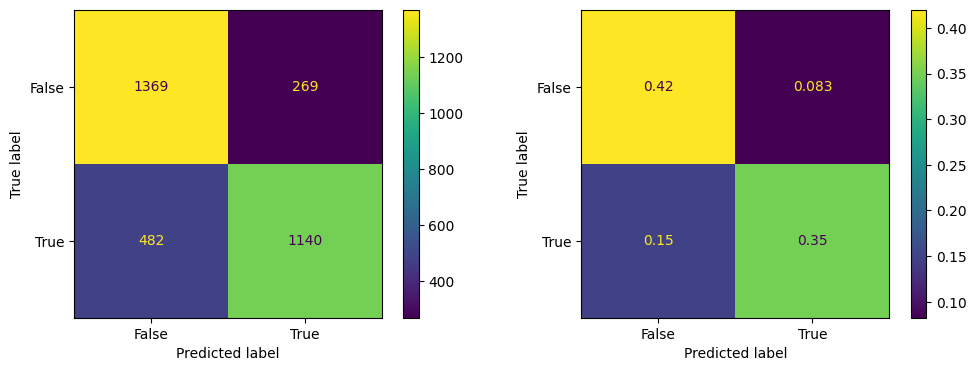

              precision    recall  f1-score   support

       False       0.74      0.84      0.78      1638
        True       0.81      0.70      0.75      1622

    accuracy                           0.77      3260
   macro avg       0.77      0.77      0.77      3260
weighted avg       0.77      0.77      0.77      3260

################################################################################
\test avaliation metrics:



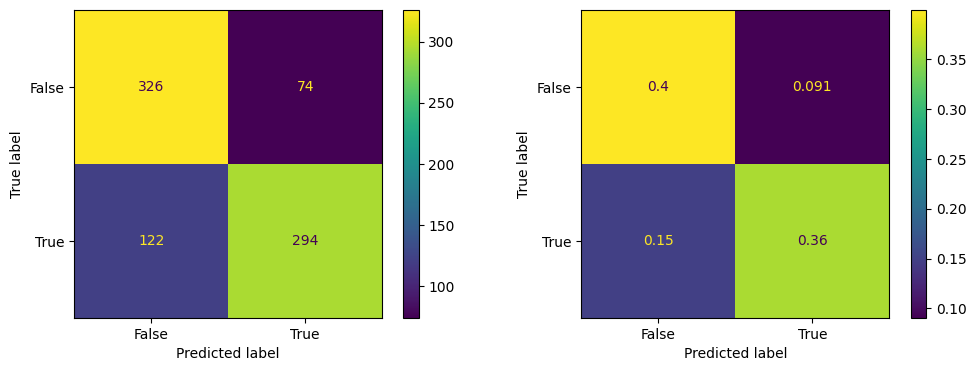

              precision    recall  f1-score   support

       False       0.73      0.81      0.77       400
        True       0.80      0.71      0.75       416

    accuracy                           0.76       816
   macro avg       0.76      0.76      0.76       816
weighted avg       0.76      0.76      0.76       816



{'False': {'precision': 0.7276785714285714,
  'recall': 0.815,
  'f1-score': 0.7688679245283019,
  'support': 400.0},
 'True': {'precision': 0.7989130434782609,
  'recall': 0.7067307692307693,
  'f1-score': 0.75,
  'support': 416.0},
 'accuracy': 0.7598039215686274,
 'macro avg': {'precision': 0.7632958074534162,
  'recall': 0.7608653846153846,
  'f1-score': 0.7594339622641509,
  'support': 816.0},
 'weighted avg': {'precision': 0.7639941846303738,
  'recall': 0.7598039215686274,
  'f1-score': 0.7592489826119128,
  'support': 816.0}}

In [69]:
pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))]).set_params(**{'rf__max_depth': 5, 
                                                                                    'rf__n_estimators': 1476})

pipe_rf.fit(X_train, y_train)

# ================================

clf_metrics(pipe_rf, X_train, y_train, "train")
print("#"*80)
clf_metrics(pipe_rf, X_test, y_test, "test")